In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [47]:
data_org = pd.read_csv('Original_data_with_more_rows.csv')
data_extended = pd.read_csv('Expanded_data_with_more_features.csv')

1.ORIGINAL DATASET

In [48]:
data_org = data_org.drop('Unnamed: 0', axis=1)
data_org.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [49]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        30641 non-null  object
 1   EthnicGroup   30641 non-null  object
 2   ParentEduc    30641 non-null  object
 3   LunchType     30641 non-null  object
 4   TestPrep      30641 non-null  object
 5   MathScore     30641 non-null  int64 
 6   ReadingScore  30641 non-null  int64 
 7   WritingScore  30641 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


CHECK FOR DUPLICATES

In [50]:
data_org.duplicated().sum()

0

TEST SCORE DISTRIBUTION

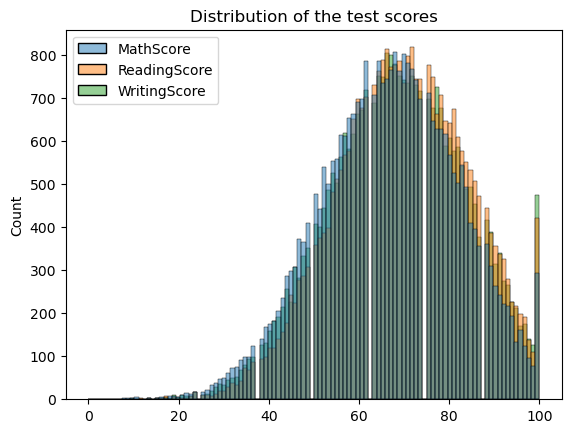

In [51]:
sns.histplot(data_org[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of the test scores');


In [52]:
data_org.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.262902,73.093815,72.897692
male,69.269633,66.108957,63.978708


2.EXTENDED DATASET

In [53]:
data_extended = data_extended.drop('Unnamed: 0', axis=1)
data_extended.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [54]:
data_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


CHECK FOR DUPLICATES

In [55]:
data_extended.duplicated().sum()

0

TEST SCORE DISTRIBUTION 

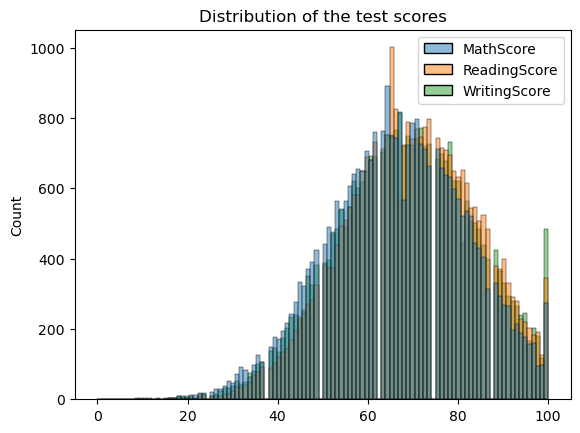

In [56]:
sns.histplot(data_extended[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of the test scores');

In [57]:
data_extended[['MathScore', 'ReadingScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

,MathScore,ReadingScore,WritingScore
mean,66.558402,69.377533,68.418622
std,15.361616,14.758952,15.443525
amax,100.000000,100.000000,100.000000
amin,0.000000,10.000000,4.000000


GENDER

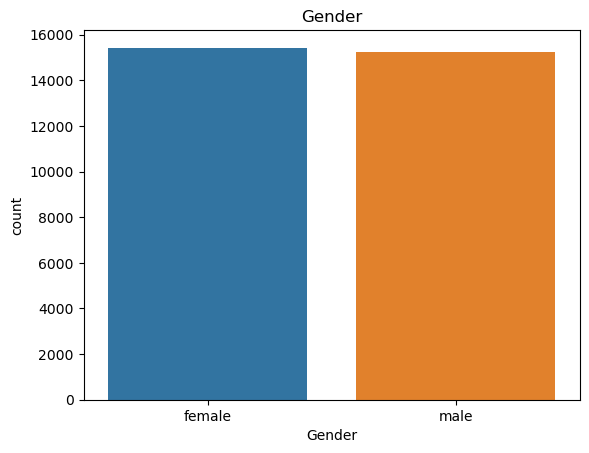

In [58]:
sns.countplot(x=data_extended['Gender'])
plt.title('Gender');


In [59]:
data_extended.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


PARENT'S EDUCATIONAL BACKGROUND

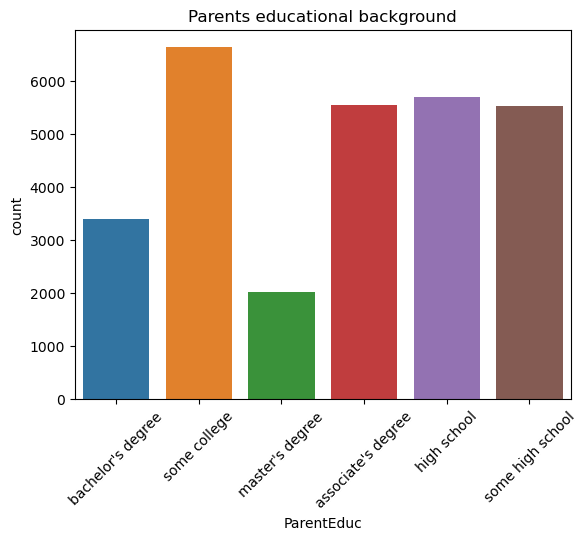

In [60]:
sns.countplot(x=data_extended['ParentEduc'])
plt.title('Parents educational background')
plt.xticks(rotation=45);


In [61]:
data_extended.groupby(['ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


ETHNIC GROUP

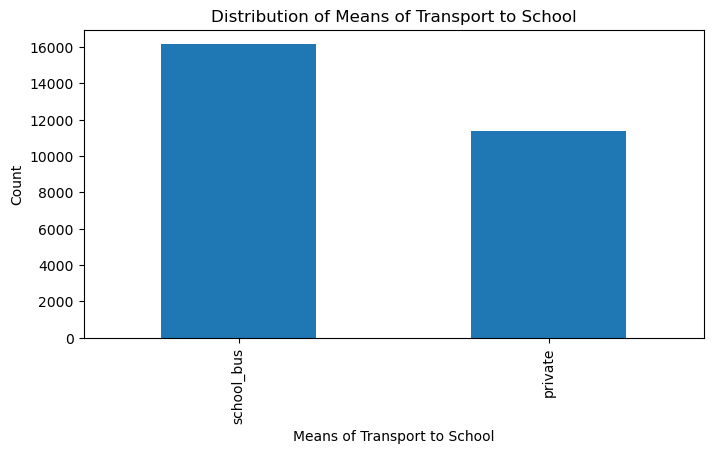

In [62]:
plt.figure(figsize=(8,4))
data_extended['TransportMeans'].value_counts().plot(kind='bar')
plt.xlabel('Means of Transport to School')
plt.ylabel('Count')
plt.title('Distribution of Means of Transport to School')
plt.show()

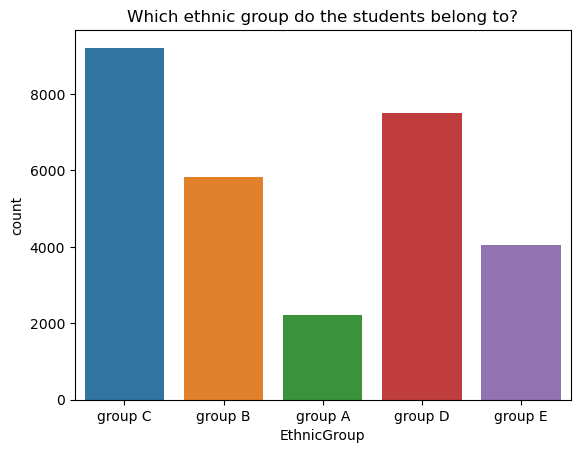

In [63]:
sns.countplot(x=data_extended['EthnicGroup'])
plt.title('Which ethnic group do the students belong to?');

LUNCH TYPE

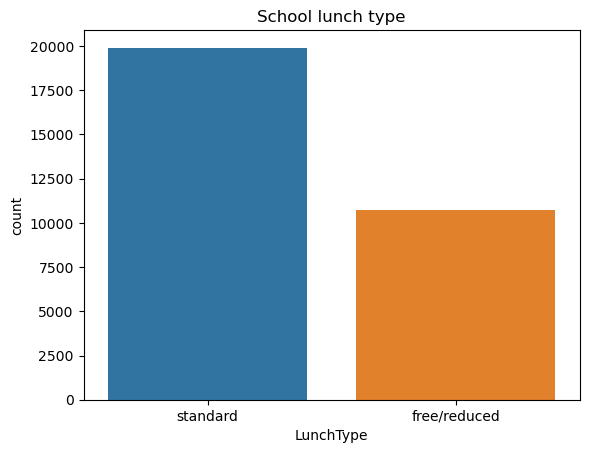

In [64]:
sns.countplot(x=data_extended['LunchType'])
plt.title('School lunch type');

In [65]:
data_extended.groupby(['LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.862332,64.189735,62.650522
standard,70.709370,72.175634,71.529716


WEEKLY STUDY HOURS

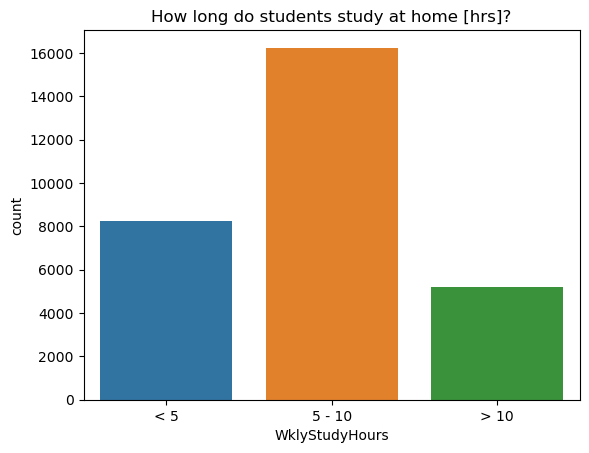

In [66]:
sns.countplot(x=data_extended['WklyStudyHours'])
plt.title('How long do students study at home [hrs]?');

In [67]:
data_extended.groupby(['WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


PRACTICE SPORT

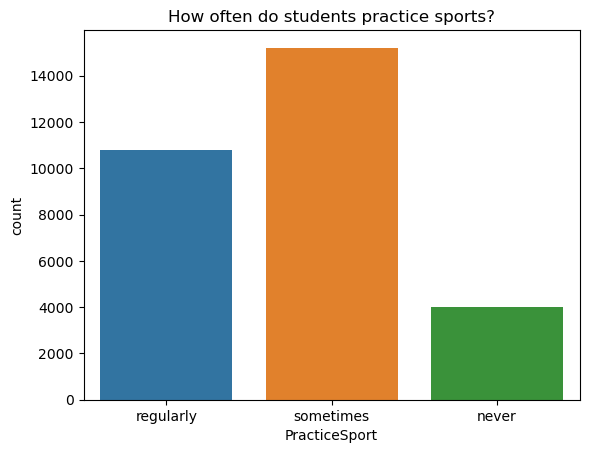

In [68]:
sns.countplot(x=data_extended['PracticeSport'])
plt.title('How often do students practice sports?');

In [69]:
data_extended.groupby(['PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


INTERACTING FEATURES

In [70]:
data_extended.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

MathScore  ReadingScore  WritingScore
Gender ParentEduc                                               
female associate's degree  65.994933     74.759682     74.913500
       bachelor's degree   67.498233     75.981154     77.217314
       high school         62.194580     70.958652     70.155664
       master's degree     70.181195     79.376102     80.804114
       some college        63.541679     72.336966     72.520766
       some high school    60.291153     69.144307     68.289340
male   associate's degree  70.715823     67.520273     65.724435
       bachelor's degree   73.452607     70.125592     69.421801
       high school         66.731933     63.377358     60.570310
       master's degree     74.531936     72.222555     71.825349
       some college        69.377393     65.869364     64.287214
       some high school    64.876042     61.878579     58.977166

In [71]:
data_extended.groupby(['EthnicGroup', 'Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

MathScore  ReadingScore  WritingScore
EthnicGroup Gender                                       
group A     female  60.696349     70.438112     69.913624
            male    65.343978     63.047445     60.475365
group B     female  61.030754     70.824265     70.312268
            male    66.028601     63.704220     61.336240
group C     female  62.207024     71.887492     71.448082
            male    67.191998     64.978474     62.536856
group D     female  65.227707     74.033439     75.436306
            male    70.126640     66.698795     66.305221
group E     female  72.813851     77.482318     76.916503
            male    77.822444     70.970574     68.372070

In [72]:
data_extended.groupby(['PracticeSport', 'TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

MathScore  ReadingScore  WritingScore
PracticeSport TestPrep                                        
never         completed  67.375678     73.056545     73.012393
              none       62.583974     66.012141     63.315257
regularly     completed  70.844084     74.345965     76.008100
              none       66.200778     67.597546     66.232944
sometimes     completed  69.201160     73.469306     74.220156
              none       64.690944     66.935224     64.757654

In [73]:
data_extended.groupby(['TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.54666,73.732998,74.703265
none,64.94877,67.051071,65.092756


In [74]:
data_extended.groupby(['WklyStudyHours', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

MathScore  ReadingScore  WritingScore
WklyStudyHours ParentEduc                                               
5 - 10         associate's degree  68.510588     71.231261     70.335798
               bachelor's degree   70.667598     73.308939     73.483240
               high school         64.713592     67.391909     65.583172
               master's degree     72.792527     76.527040     76.881023
               some college        66.937322     69.635328     68.936752
               some high school    62.942637     65.818468     63.884225
< 5            associate's degree  66.333790     69.911583     68.939685
               bachelor's degree   68.432755     71.955531     72.104121
               high school         62.707235     66.014199     64.086545
               master's degree     70.309524     74.335034     74.760204
               some college        64.306167     68.012665     67.211454
               some high school    60.633822     64.457390     62.374834
> 10           associate's degree  71.043386     72.908995     72.539683
               bachelor's degree   73.057451     74.438061     75.235189
               high school         66.359743     68.529979     66.889722
               master's degree     74.187845     76.212707     77.281768
               some college        68.195341     69.620072     69.209677
               some high school    64.638493     66.076375     64.600815

In [75]:
data_extended.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

MathScore  ReadingScore  WritingScore
Gender PracticeSport                                       
female never          61.979208     71.805941     70.983663
       regularly      65.297035     73.428624     73.994510
       sometimes      63.754529     72.704384     72.530717
male   never          66.402722     64.806452     61.980847
       regularly      70.445675     66.369112     65.102271
       sometimes      68.802765     65.767742     63.600658